In [1]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import numpy as np
pd.set_option('notebook_repr_html',False)


In [2]:
#In Python: Define a database name (we're using a dataset on births, so I call it 
# birth_db), and your username for your computer (CHANGE IT BELOW). 
dbname = 'opensyl'
username = 'parama'

In [3]:
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print engine.url

postgres://parama@localhost/opensyl


In [4]:
try:
    conn = psycopg2.connect(database = 'opensyl', user = 'parama' , password = 'pargop')
except:
    print 'Unable to con hon'

In [10]:
sql_query = """
select fdclass, field,sum(mcount) as males, sum(fcount) as females from all_info group by fdclass,field order by fdclass,field 
"""
workmat = pd.read_sql_query(sql_query,conn)

In [11]:
workmat['ratio']=workmat.females/workmat.males


In [12]:
workmat

    fdclass                              field     males  females     ratio
0         1                       Anthropology   45963.0  13646.0  0.296891
1         1            Area and Ethnic Studies   45589.0  12491.0  0.273992
2         1                          Economics   48584.0   9512.0  0.195785
3         1                           Politics   33027.0   7439.0  0.225240
4         1                         Psychology   11440.0   3693.0  0.322815
5         1                  Religious Studies    2017.0    597.0  0.295984
6         1                          Sociology   33617.0  11330.0  0.337032
7         1   Theology and Religious Education     372.0     80.0  0.215054
8         1                    Women's Studies     488.0    526.0  1.077869
9         2         Astronomy and Astrophysics    2378.0    493.0  0.207317
10        2                            Biology   64302.0  14618.0  0.227334
11        2                          Chemistry    1833.0    438.0  0.238953
12        2 

In [13]:
workmat.to_csv('new_bubble_json_data.csv')

In [16]:
sql_query = """
select fdclass,inst,sum(mcount) as males, sum(fcount) as females from all_info group by fdclass,inst
"""
workmat = pd.read_sql_query(sql_query,conn)

In [18]:
workmat['ratio']=workmat.females/workmat.males
workmat['nrec']=workmat.females+workmat.males

In [23]:
workmat.head(10)

   fdclass                                           inst     ratio    nrec
0        2                       University of Manchester  0.098592    78.0
1        1                       Florida State University  0.250891  1755.0
2        1  Université du Droit et de la Sante (Lille II)  0.041667    50.0
3        2                                Bowdoin College  0.179688   151.0
4        5                  Northwest Nazarene University  0.141176    97.0
5        5                          University of Salford  0.306452   162.0
6        5                           University of Dayton  0.267717   322.0
7        5                          University of Warwick  0.283394   711.0
8        5                   City University of Hong Kong  0.250000    10.0
9        1                    Western Carolina University  1.200000    11.0

In [21]:
workmat = workmat.drop('males',1)
workmat = workmat.drop('females',1)

In [25]:
workmat.to_sql('webpage_query',engine)

In [69]:
sql_query = """
SELECT inst,fdclass,ratio,nrec FROM webpage_query WHERE inst ILIKE '%california%' ORDER BY inst,fdclass,nrec desc
"""
qout = pd.read_sql_query(sql_query,conn)

In [70]:
qout.head(6)

                                       inst  fdclass     ratio   nrec
0             California Baptist University        5  0.200000    6.0
1  California Institute of Integral Studies        1  0.233333   74.0
2  California Institute of Integral Studies        3  0.260870   87.0
3        California Institute of Technology        1  0.160000   58.0
4        California Institute of Technology        2  0.222222  253.0
5        California Institute of Technology        3  0.333333    8.0

In [35]:
name1 = np.array(qout[qout.fdclass == 1].inst)[0]

In [66]:
ratiolist = []
recordlist = []

for i in range(1,6):
        try:
            val = np.array(qout[qout.fdclass == i].ratio)[0]
        except:
            val = 0
        print val
        ratiolist.append(val)
        try:
            val = np.array(qout[qout.fdclass == i].nrec)[0]
        except: 
            val = 0
        recordlist.append(val)


0.25
0
0
0
0.166666666667


In [122]:
sql_query = """
select * from date_count1 order by date
"""
workmat = pd.read_sql_query(sql_query,conn)

In [123]:
workmat.head(25)

    date  mcount  fcount
0   0079       1       0
1   0083       1       0
2   0227       1       0
3   1000       1       0
4   1010       1       0
5   1011       1       0
6   1012       1       0
7   1014       1       0
8   1018       2       0
9   1019       8       0
10  1051       1       0
11  1066       0       1
12  1071       0       0
13  1111       1       0
14  1114       1       0
15  1118       0       0
16  1119       2       2
17  1132       0       0
18  1148       1       0
19  1149       1       1
20  1175       2       0
21  1178       1       0
22  1179       1       1
23  1180       1       0
24  1181       1       0

In [17]:
workmat.shape

(902, 3)

In [18]:
for index in range(0,901):
    workmat.date[index] = int(workmat.date[index])

/home/parama/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [25]:
df = workmat[workmat.date >= 1900]
df = df[df.date <= 2005]

In [26]:
df.shape, workmat.shape

((106, 3), (902, 3))

In [33]:
df.to_csv('published_data.csv')

In [29]:
df['ratio']=df.fcount/df.mcount

In [31]:
from scipy.signal import savgol_filter
df['filtered'] = savgol_filter(df.ratio,25,5)

In [110]:
df

     date  mcount  fcount     ratio  filtered
498  1900    1867     319  0.170862  0.163695
499  1901    1720     261  0.151744  0.154322
500  1902    1751     256  0.146202  0.148259
501  1903    1850     223  0.120541  0.144793
502  1904    1688     260  0.154028  0.143322
503  1905    1823     271  0.148656  0.143342
504  1906    1878     273  0.145367  0.144439
505  1907    1959     311  0.158754  0.146281
506  1908    2299     376  0.163549  0.148606
507  1909    2416     343  0.141970  0.151213
508  1910    1853     294  0.158662  0.153953
509  1911    1923     277  0.144046  0.156718
510  1912    2066     297  0.143756  0.159434
511  1913    2013     330  0.163934  0.162131
512  1914    2028     301  0.148422  0.163900
513  1915    1794     314  0.175028  0.165332
514  1916    1647     295  0.179114  0.168953
515  1917    1642     288  0.175396  0.171156
516  1918    1532     286  0.186684  0.172234
517  1919    1635     295  0.180428  0.173371
518  1920    1790     263  0.14692

In [35]:
sql_query = """
SELECT mcount,fcount FROM all_info 
WHERE fdclass = 1
"""
f1 = pd.read_sql_query(sql_query,conn)

In [36]:
sql_query = """
SELECT mcount,fcount FROM all_info 
WHERE fdclass = 2
"""
f2 = pd.read_sql_query(sql_query,conn)

In [37]:
sql_query = """
SELECT mcount,fcount FROM all_info 
WHERE fdclass = 3
"""
f3 = pd.read_sql_query(sql_query,conn)

In [38]:
sql_query = """
SELECT mcount,fcount FROM all_info 
WHERE fdclass = 4
"""
f4 = pd.read_sql_query(sql_query,conn)

In [39]:
sql_query = """
SELECT mcount,fcount FROM all_info 
WHERE fdclass = 5
"""
f5 = pd.read_sql_query(sql_query,conn)

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib qt

from pylab import rcParams
X1 = f1.fcount/1
Y1 = f1.mcount/1
X2 = f2.fcount/1
Y2 = f2.mcount/1
X3 = f3.fcount/1
Y3 = f3.mcount/1
X4 = f4.fcount/1
Y4 = f4.mcount/1
X5 = f5.fcount/1
Y5 = f5.mcount/1
X = range(0,1500)

lo = plt.scatter(X1,Y1,color='red')
ll = plt.scatter(X2,Y2,color='blue')
l = plt.scatter(X3,Y3,color='orange')
a = plt.scatter(X4,Y4,color='green')
h = plt.scatter(X5,Y5,color='purple')
hh = plt.plot(X,X,color='black')

plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.xlabel('No. of Female Authors',size = 18)
plt.ylabel('No. of Male Authors',size=18)
plt.title('Author count in each syllabus',size = 20)

#plt.text(0.5, 1.08, plt.title,horizontalalignment='center',fontsize=20)
plt.legend((lo, ll, l, a, h, hh),
           ('Soc.Sc.', 'Nat.Sc.', 'Engg.', 'Proff.', 'Humn'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

plt.savefig('scat1', format='png')

NameError: name 'f1' is not defined

In [9]:
sql_query = """
SELECT * FROM scat2 """
f2 = pd.read_sql_query(sql_query,conn)

In [10]:
f2

                                                   inst     ratio
0                       Northwest Florida State College  0.017241
1                   Université Paris Nanterre (Paris X)  0.021277
2                                   University of Crete  0.023256
3                       Technical University of Denmark  0.036585
4              Southern Arkansas University Main Campus  0.038462
5         Université du Droit et de la Sante (Lille II)  0.041667
6                                      Akita University  0.047619
7                        University of Economics Prague  0.049645
8                                     Jiwaji University  0.050000
9                                 Multimedia University  0.052632
10                                       Regent College  0.052632
11                                 Saint Leo University  0.054054
12                                          Coe College  0.054545
13               Indian Institute of Technology, Bombay  0.058728
14        

In [16]:
plt.hist(np.array(f2.ratio))
plt.show()

In [13]:
x = np.array(f2.ratio)

In [22]:
import matplotlib.mlab as mlab
#%matplotlib inline

n, bins, patches = plt.hist(x, 500, normed=1, facecolor='brown', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, 0.25, 0.1)
l = plt.plot(bins, y, 'b--', linewidth=1)

plt.xlabel('Gender Ratio')
plt.ylabel('Frequency')
plt.title('Distribution across Institutions')
plt.axis([0, 2, 0, 4])
plt.grid(True)

#plt.show()
plt.savefig('scat2.png')
plt.savefig('scat2', format='png')

In [21]:
f2.to_csv('histogram_data.csv')

In [128]:
sql_query = """
select * from date_info order by date
"""
workmat = pd.read_sql_query(sql_query,conn)

In [163]:
workmat = workmat[396448:910000]

In [164]:
workmat.shape

(513552, 5)

In [165]:
workmat.head()

         index       id  date gender  checker
396448   81462  1136012  1980      m        4
396449  146469  1534121  1980      m        4
396450   81470  1136090  1980      m        4
396451  142646  1510226  1980      m        4
396452   81582  1136971  1980      m        4

In [166]:
workmat.to_sql('scat5',engine)

In [167]:
sql_query = """
select * from scat6 order by field
"""
workmat1 = pd.read_sql_query(sql_query,conn)

In [168]:
sql_query = """
select field,sum(mcount) as males, sum(fcount) as females from all_info group by field order by field 
"""
workmat2 = pd.read_sql_query(sql_query,conn)

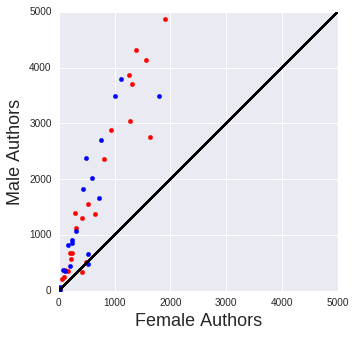

In [176]:
import numpy as np
import pylab as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

X1 = workmat1.fcount/1
Y1 = workmat1.mcount/1
X2 = workmat2.females/1
Y2 = workmat2.males/1

plt.scatter(X1,Y1,color='r')
plt.scatter(X2,Y2,color='b')
plt.plot(X1,X1,color='black')

plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.xlabel('Female Authors',size = 18)
plt.ylabel('Male Authors',size=18)
#plt.title('No. of Male/Female authors in every 10K texts',size = 20)

#plt.text(0.5, 1.08, plt.title,horizontalalignment='center',fontsize=20)


#plt.show()
plt.savefig('scat3.png')

In [170]:
workmat1.shape, workmat2.shape

((46, 3), (46, 3))

In [173]:
workmat2

                                field     males  females
0                         Agriculture   33687.0   7537.0
1                        Anthropology   45963.0  13646.0
2                        Architecture   37667.0   9684.0
3             Area and Ethnic Studies   45589.0  12491.0
4                                 Art    6918.0   2373.0
5          Astronomy and Astrophysics    2378.0    493.0
6                             Biology   64302.0  14618.0
7                            Business   36370.0   8178.0
8                           Chemistry    1833.0    438.0
9                   Civil Engineering    5725.0   1656.0
10                           Classics   13561.0   3315.0
11                   Computer Science    3795.0   1112.0
12                          Dentistry    3488.0   1005.0
13                     Earth Sciences    2697.0    757.0
14                          Economics   48584.0   9512.0
15                          Education   30673.0  10764.0
16                        Engin